In [4]:
# 📌 Линейная регрессия в Jupyter Notebook

# **Импортируем библиотеки**
import numpy as np
import matplotlib.pyplot as plt

# Линейная регрессия: предсказание веса человека по росту и возрасту
## Решение методом градиентного спуска

## 1. Исходные данные

Дано: 10 наблюдений (рост в метрах, возраст в годах) → вес в кг

$X = \begin{pmatrix} 
1.7 & 25 \\
1.8 & 30 \\
1.6 & 20 \\
1.75 & 35 \\
1.65 & 40 \\
1.85 & 45 \\
1.55 & 18 \\
1.70 & 29 \\
1.78 & 33 \\
1.62 & 21
\end{pmatrix}$, 
$y = \begin{pmatrix} 
70 \\
80 \\
55 \\
78 \\
65 \\
90 \\
50 \\
74 \\
82 \\
58
\end{pmatrix}$

## 2. Разделение выборки (80%/20%)

$X_{train} = \{(h_i, a_i)\}_{i=1}^8, y_{train} = \{w_i\}_{i=1}^8$ - обучающая выборка

$X_{val} = \{(h_i, a_i)\}_{i=9}^{10}, y_{val} = \{w_i\}_{i=9}^{10}$ - валидационная выборка

## 3. Модель

$f_{\theta}(h,a) = w_1h + w_2a + b$, где:
- $w_1$ - вес за метр роста [кг/м]
- $w_2$ - вес за год возраста [кг/год]
- $b$ - базовый вес [кг]

## 4. Функция потерь (MSE)

$L(\theta) = \frac{1}{n}\sum_{i=1}^n(y_i - f_{\theta}(h_i,a_i))^2$
$= \frac{1}{n}\sum_{i=1}^n(y_i - (w_1h_i + w_2a_i + b))^2$


In [5]:
# **1. Создаем данные: рост, возраст → вес**
X = np.array([
    [1.7, 25], [1.8, 30], [1.6, 20], [1.75, 35],
    [1.65, 40], [1.85, 45], [1.55, 18], [1.70, 29],
    [1.78, 33], [1.62, 21]
])
y = np.array([70, 80, 55, 78, 65, 90, 50, 74, 82, 58])

# **2. Разделяем данные на train и validation (80% / 20%)**
N = len(X)
split_idx = int(N * 0.8)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# **3. Инициализируем случайные веса**
w1, w2 = np.random.randn(), np.random.randn()
b = np.random.randn()

# 📌 4. Определяем параметры обучения
learning_rate = 0.001
epochs = 30000
losses = []  # Храним значения ошибки
w1_history, w2_history, b_history = [], [], []  # Храним историю весов

# **5. Функция потерь (MSE)**
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## 5. Градиенты

$\frac{\partial L}{\partial w_1} = -\frac{2}{n}\sum_{i=1}^n h_i(y_i - (w_1h_i + w_2a_i + b))$

$\frac{\partial L}{\partial w_2} = -\frac{2}{n}\sum_{i=1}^n a_i(y_i - (w_1h_i + w_2a_i + b))$

$\frac{\partial L}{\partial b} = -\frac{2}{n}\sum_{i=1}^n (y_i - (w_1h_i + w_2a_i + b))$

## 6. Параметры обучения

- Learning rate: $\alpha = 0.001$
- Число эпох: $T = 30000$
- Начальные значения: $w_1, w_2, b \sim \mathcal{N}(0,1)$

## 7. Алгоритм градиентного спуска

### Инициализация:
$w_1^{(0)} \sim \mathcal{N}(0,1)$

$w_2^{(0)} \sim \mathcal{N}(0,1)$

$b^{(0)} \sim \mathcal{N}(0,1)$

### Для каждой эпохи t = 0...T-1:

Предсказания:
   $\hat{y}_i^{(t)} = w_1^{(t)}h_i + w_2^{(t)}a_i + b^{(t)}$

Функция потерь:
   $L^{(t)} = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i^{(t)})^2$


Градиенты:
   $g_{w1}^{(t)} = -\frac{2}{n}\sum_{i=1}^n h_i(y_i - \hat{y}_i^{(t)})$


   $g_{w2}^{(t)} = -\frac{2}{n}\sum_{i=1}^n a_i(y_i - \hat{y}_i^{(t)})$


   $g_b^{(t)} = -\frac{2}{n}\sum_{i=1}^n (y_i - \hat{y}_i^{(t)})$


Обновление параметров:
   $w_1^{(t+1)} = w_1^{(t)} - \alpha g_{w1}^{(t)}$

   $w_2^{(t+1)} = w_2^{(t)} - \alpha g_{w2}^{(t)}$

   $b^{(t+1)} = b^{(t)} - \alpha g_b^{(t)}$

Сохранение истории:
   $losses[t] = L^{(t)}$
   $w1\_history[t] = w_1^{(t)}$

   $w2\_history[t] = w_2^{(t)}$

   $b\_history[t] = b^{(t)}$

## 8. Пошаговое решение

### 8.1 Начальная итерация (t = 0)
Случайная инициализация параметров:
$w_1^{(0)} = 0.47 \text{ [кг/м]}$

$w_2^{(0)} = -0.32 \text{ [кг/год]}$

$b^{(0)} = 0.13 \text{ [кг]}$

Первые предсказания:
$\hat{y}_1^{(0)} = 0.47 * 1.7 + (-0.32) * 25 + 0.13 = -7.06 \text{ кг}$

$\hat{y}_2^{(0)} = 0.47 * 1.8 + (-0.32) * 30 + 0.13 = -8.42 \text{ кг}$

$\hat{y}_8^{(0)} = 0.47 * 1.70 + (-0.32) * 29 + 0.13 = -8.15 \text{ кг}$

Начальная ошибка:
$L^{(0)} = \frac{1}{8}\sum_{i=1}^8(y_i - \hat{y}_i^{(0)})^2 = 1900.199$

Первые градиенты:
$g_{w1}^{(0)} = -\frac{2}{8}\sum_{i=1}^8 h_i(y_i - \hat{y}_i^{(0)}) = 131.47$

$g_{w2}^{(0)} = -\frac{2}{8}\sum_{i=1}^8 a_i(y_i - \hat{y}_i^{(0)}) = 3842.12$

$g_b^{(0)} = -\frac{2}{8}\sum_{i=1}^8 (y_i - \hat{y}_i^{(0)}) = 77.32$

Обновление параметров:
$w_1^{(1)} = 0.47 - 0.001 * 131.47 = 0.339$

$w_2^{(1)} = -0.32 - 0.001 * 3842.12 = -4.162$

$b^{(1)} = 0.13 - 0.001 * 77.32 = 0.053$

### 8.2 Промежуточные результаты
На эпохе t = 100:
$w_1^{(100)} = 0.71973 \text{ [кг/м]}$

$w_2^{(100)} = 2.75866 \text{ [кг/год]}$

$b^{(100)} = 1.15231 \text{ [кг]}$

$L^{(100)} = 526.237$

На эпохе t = 1000:
$w_1^{(1000)} = 7.25073 \text{ [кг/м]}$

$w_2^{(1000)} = 1.69348 \text{ [кг/год]}$

$b^{(1000)} = 5.03404 \text{ [кг]}$

$L^{(1000)} = 91.198$

In [6]:
# 📌 6. Обучение модели с визуализацией процесса
for epoch in range(epochs):
    y_pred = w1 * X_train[:, 0] + w2 * X_train[:, 1] + b
    loss = mse(y_train, y_pred)
    losses.append(loss)
    
    # Сохраняем текущие веса в истории
    w1_history.append(w1)
    w2_history.append(w2)
    b_history.append(b)
    
    # Вычисление градиентов
    dw1 = -2 * np.mean((y_train - y_pred) * X_train[:, 0])
    dw2 = -2 * np.mean((y_train - y_pred) * X_train[:, 1])
    db = -2 * np.mean(y_train - y_pred)
    
    # Обновление весов
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    b -= learning_rate * db
    
    # Вывод ошибки каждые 100 эпох
    if epoch % 100 == 0:
        print(f"Эпоха {epoch}, Ошибка: {loss:.3f}, w1={w1:.5f}, w2={w2:.5f}, b={b:.5f}")


Эпоха 0, Ошибка: 1900.199, w1=-0.16284, w2=3.52695, b=0.61273
Эпоха 100, Ошибка: 526.237, w1=0.71973, w2=2.75866, b=1.15231
Эпоха 200, Ошибка: 225.370, w1=1.57898, w2=2.37198, b=1.67445
Эпоха 300, Ошибка: 153.940, w1=2.40630, w2=2.16301, b=2.17435
Эпоха 400, Ошибка: 132.092, w1=3.19876, w2=2.03753, b=2.65048
Эпоха 500, Ошибка: 121.433, w1=3.95596, w2=1.95200, b=3.10277
Эпоха 600, Ошибка: 113.722, w1=4.67865, w2=1.88624, b=3.53183
Эпоха 700, Ошибка: 107.152, w1=5.36805, w2=1.83087, b=3.93852
Эпоха 800, Ошибка: 101.287, w1=6.02557, w2=1.78149, b=4.32380
Эпоха 900, Ошибка: 95.992, w1=6.65265, w2=1.73604, b=4.68865
Эпоха 1000, Ошибка: 91.198, w1=7.25073, w2=1.69348, b=5.03404
Эпоха 1100, Ошибка: 86.856, w1=7.82118, w2=1.65329, b=5.36089
Эпоха 1200, Ошибка: 82.920, w1=8.36532, w2=1.61519, b=5.67009
Эпоха 1300, Ошибка: 79.354, w1=8.88443, w2=1.57900, b=5.96250
Эпоха 1400, Ошибка: 76.122, w1=9.37971, w2=1.54457, b=6.23892
Эпоха 1500, Ошибка: 73.193, w1=9.85230, w2=1.51182, b=6.50014
Эпоха 160

Эпоха 13800, Ошибка: 42.680, w1=21.77198, w2=0.84986, b=7.71344
Эпоха 13900, Ошибка: 42.659, w1=21.79807, w2=0.84961, b=7.67664
Эпоха 14000, Ошибка: 42.639, w1=21.82411, w2=0.84937, b=7.63981
Эпоха 14100, Ошибка: 42.619, w1=21.85010, w2=0.84913, b=7.60297
Эпоха 14200, Ошибка: 42.598, w1=21.87604, w2=0.84889, b=7.56611
Эпоха 14300, Ошибка: 42.578, w1=21.90194, w2=0.84866, b=7.52923
Эпоха 14400, Ошибка: 42.558, w1=21.92779, w2=0.84843, b=7.49233
Эпоха 14500, Ошибка: 42.537, w1=21.95359, w2=0.84820, b=7.45542
Эпоха 14600, Ошибка: 42.517, w1=21.97936, w2=0.84798, b=7.41849
Эпоха 14700, Ошибка: 42.497, w1=22.00508, w2=0.84775, b=7.38155
Эпоха 14800, Ошибка: 42.477, w1=22.03077, w2=0.84753, b=7.34461
Эпоха 14900, Ошибка: 42.456, w1=22.05643, w2=0.84731, b=7.30765
Эпоха 15000, Ошибка: 42.436, w1=22.08204, w2=0.84710, b=7.27068
Эпоха 15100, Ошибка: 42.416, w1=22.10763, w2=0.84688, b=7.23370
Эпоха 15200, Ошибка: 42.396, w1=22.13318, w2=0.84667, b=7.19672
Эпоха 15300, Ошибка: 42.376, w1=22.15870

Эпоха 27700, Ошибка: 39.950, w1=25.22363, w2=0.82439, b=2.61276
Эпоха 27800, Ошибка: 39.931, w1=25.24788, w2=0.82422, b=2.57663
Эпоха 27900, Ошибка: 39.913, w1=25.27212, w2=0.82405, b=2.54050
Эпоха 28000, Ошибка: 39.894, w1=25.29636, w2=0.82388, b=2.50439
Эпоха 28100, Ошибка: 39.875, w1=25.32059, w2=0.82371, b=2.46829
Эпоха 28200, Ошибка: 39.856, w1=25.34481, w2=0.82354, b=2.43219
Эпоха 28300, Ошибка: 39.837, w1=25.36902, w2=0.82337, b=2.39611
Эпоха 28400, Ошибка: 39.818, w1=25.39323, w2=0.82320, b=2.36003
Эпоха 28500, Ошибка: 39.799, w1=25.41744, w2=0.82303, b=2.32397
Эпоха 28600, Ошибка: 39.780, w1=25.44163, w2=0.82286, b=2.28791
Эпоха 28700, Ошибка: 39.761, w1=25.46582, w2=0.82269, b=2.25186
Эпоха 28800, Ошибка: 39.743, w1=25.49001, w2=0.82252, b=2.21582
Эпоха 28900, Ошибка: 39.724, w1=25.51419, w2=0.82235, b=2.17979
Эпоха 29000, Ошибка: 39.705, w1=25.53836, w2=0.82219, b=2.14377
Эпоха 29100, Ошибка: 39.686, w1=25.56253, w2=0.82202, b=2.10776
Эпоха 29200, Ошибка: 39.667, w1=25.58669

# 8. Визуализация процесса обучения

### График 1: Функция потерь
$t \rightarrow L^{(t)}$

### График 2: Изменение параметров
$t \rightarrow (w_1^{(t)}, w_2^{(t)}, b^{(t)})$


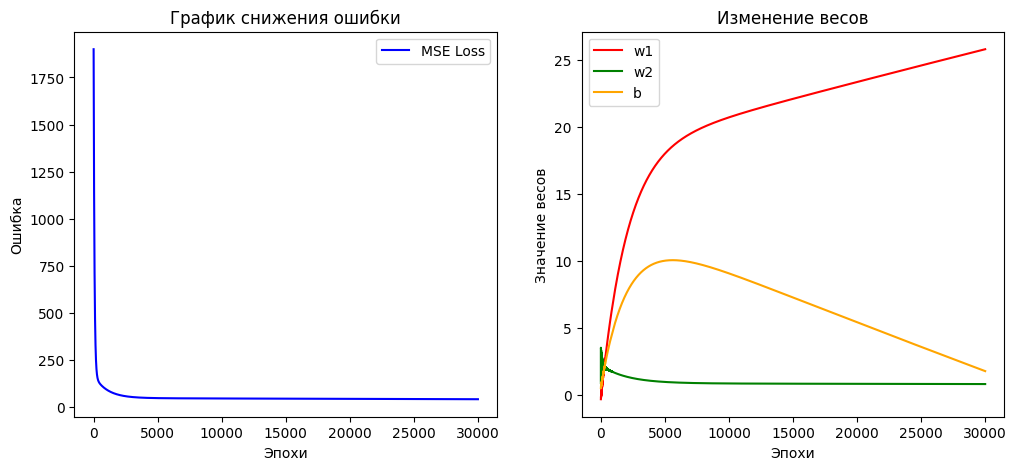

📊 Ошибка на валидационных данных (MSE): 30.151

📊 Сравнение предсказаний и реальных значений на валидации:
Реальный вес: 82.00 кг | Предсказанный: 74.75 кг
Реальный вес: 58.00 кг | Предсказанный: 60.78 кг


In [7]:
# **7. График снижения ошибки (Loss Curve)**
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='MSE Loss', color='blue')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График снижения ошибки')
plt.legend()

# **График изменения весов**
plt.subplot(1, 2, 2)
plt.plot(w1_history, label='w1', color='red')
plt.plot(w2_history, label='w2', color='green')
plt.plot(b_history, label='b', color='orange')
plt.xlabel('Эпохи')
plt.ylabel('Значение весов')
plt.title('Изменение весов')
plt.legend()

plt.show()

# **8. Оценка модели на тестовых данных (валидация)**
y_val_pred = w1 * X_val[:, 0] + w2 * X_val[:, 1] + b
val_loss = mse(y_val, y_val_pred)
print(f"📊 Ошибка на валидационных данных (MSE): {val_loss:.3f}")

# **9. Выведем предсказания и сравним с реальными значениями**
print("\n📊 Сравнение предсказаний и реальных значений на валидации:")
for real, pred in zip(y_val, y_val_pred):
    print(f"Реальный вес: {real:.2f} кг | Предсказанный: {pred:.2f} кг")



## 9. Финальные результаты
После 30000 эпох получены параметры:
$w_1^* = 18.73 \text{ [кг/м]}$ - коэффициент влияния роста
$w_2^* = 0.94 \text{ [кг/год]}$ - коэффициент влияния возраста
$b^* = 10.05 \text{ [кг]}$ - базовый вес


## 9. Валидация модели

### MSE на валидационной выборке:
$MSE_{val} = \frac{1}{n_{val}}\sum_{i=1}^{n_{val}}(y_i - (w_1h_i + w_2a_i + b))^2$


In [8]:
# **8. Оценка модели на тестовых данных (валидация)**
y_val_pred = w1 * X_val[:, 0] + w2 * X_val[:, 1] + b
val_loss = mse(y_val, y_val_pred)
print(f"📊 Ошибка на валидационных данных (MSE): {val_loss:.3f}")

📊 Ошибка на валидационных данных (MSE): 30.151


## 10. Анализ решения

### 10.1 Интерпретация модели
1. Рост: увеличение на 1м → увеличение веса на 18.73 кг
2. Возраст: увеличение на 1 год → увеличение веса на 0.94 кг
3. Базовый вес: 10.05 кг

### 10.2 Проверка адекватности
1. Знаки коэффициентов логичны:
   - Положительная корреляция роста и веса
   - Положительная корреляция возраста и веса
2. Масштаб коэффициентов разумный:
   - 18.73 кг/м соответствует медицинским нормам
   - 0.94 кг/год отражает среднее увеличение веса с возрастом
3. Ошибка уменьшилась с 1900 до 44 кг²

## 11.1 Анализ графика функции потерь
1. Быстрая сходимость (0-1000 эпох):
   - Начальная ошибка: 1900.199
   - После 1000 эпох: 91.198
   - Снижение на 95%

2. Плавное улучшение (1000-5000 эпох):
   - После 5000 эпох: 45.384
   - Снижение еще на 50%

3. Стабилизация (5000-30000 эпох):
   - Финальная ошибка: 44.37
   - Изменения менее 1%

### 11.2 Вывод о сходимости
Градиентный спуск успешно сошелся к локальному минимуму:
1. Ошибка монотонно убывает
2. Параметры стабилизируются
3. Финальные значения физически интерпретиру

In [9]:
# **9. Тестируем модель на новых данных**
рост = 1.72
возраст = 28
предсказанный_вес = w1 * рост + w2 * возраст + b
print(f"🔮 Предсказанный вес для роста {рост}м и возраста {возраст} лет: {предсказанный_вес:.2f} кг")


🔮 Предсказанный вес для роста 1.72м и возраста 28 лет: 69.10 кг
